# <center> Churn Rate Prediction </center> 
<img src = "https://insightwhale.com/wp-content/uploads/2019/08/churn-rate-formula-visual-image.png">

The churn rate is a metric that shows us the total percentage of clients who discontinue their subscriptions within a certain period.<br><br>

Understandably, a high churn rate could affect a company's profitablity and also impact growth, so it's important to keep track of a company's churn rate and try to identify patterns among clients who discontinue their subscripitons in order to develop strategies to reach these clients with a better service, bonuses or any other incentive to keep them as clients for a long period of time.<br><br>

In this project, I'll do an exploratory data analysis on a Telco dataset to find what the clients who left the company have in common and afterwards I'll develop a machine learning model for a churn prediction.

In [62]:
# Importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

# Loading Data

In [2]:
df = pd.read_csv('data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# For this project, we won't use the customerID column, so let's drop it!
df.drop(columns = ['customerID'], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Checking data typer
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges** should be in *float* format, just like MonthlyCharges, not in *object*. Let's change it! 

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [6]:
# Checking missing data
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges have 11 missing data. Let's investigate it!

In [7]:
null = df[df.isnull().any(axis=1)]
null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


If we look closely, we can see that all customers with null TotalCharges are those who have tenure as 0 in the dataset.<br><br>
It's possible to presume that these are **new clients** or they're on a trial period. I will, then, change their TotalCharges value to 0 instead of simply dropping them out.

In [8]:
# Filling NaN TotalCharges with a 0
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f"------ {i} ------\n")
    print(df[i].value_counts())
    print('='*35)


------ gender ------

Male      3555
Female    3488
Name: gender, dtype: int64
------ SeniorCitizen ------

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------ Partner ------

No     3641
Yes    3402
Name: Partner, dtype: int64
------ Dependents ------

No     4933
Yes    2110
Name: Dependents, dtype: int64
------ tenure ------

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
------ PhoneService ------

Yes    6361
No      682
Name: PhoneService, dtype: int64
------ MultipleLines ------

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------ InternetService ------

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------ OnlineSecurity ------

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------ Onlin

# Visualizing Data

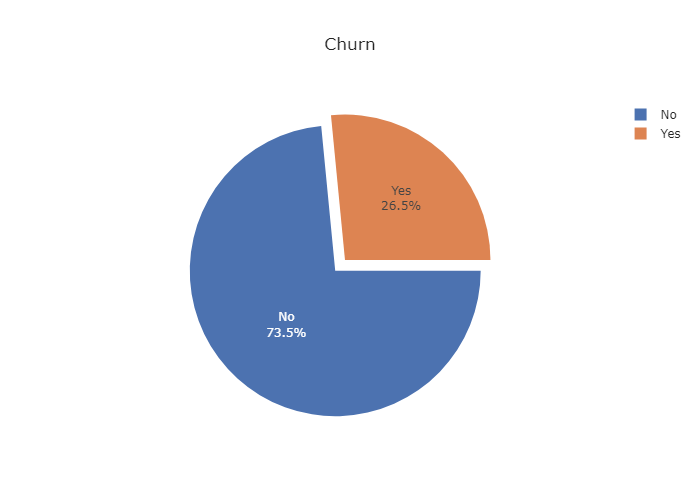

In [82]:
# Visualizing Churn proportion
fig = px.pie(df, names = 'Churn', template = 'seaborn',
            title = 'Churn')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show('png')

The first thing we notice here is that our **target variable** is unbalanced, which means we have a much larger proportion of one specific class over another.<br><br>
Only 26.5% of clients in the dataset were those who left the company. 

        count  mean   std  min   25%   50%   75%   max
Churn                                                 
No     5174.0  38.0  24.0  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  18.0  20.0  1.0   2.0  10.0  29.0  72.0


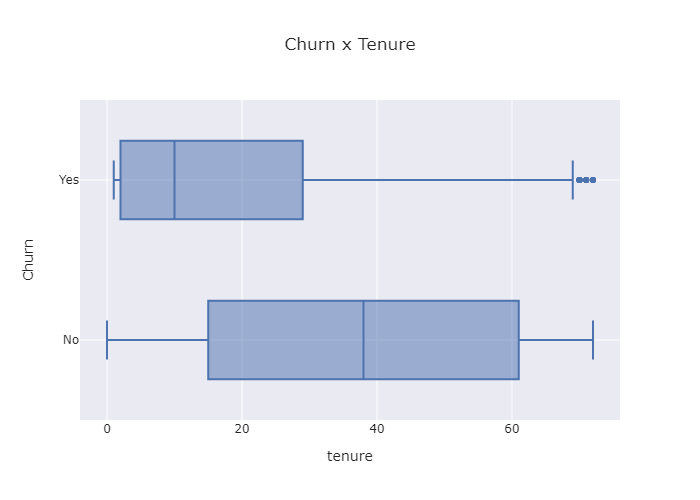

In [83]:
# Statistics on churn x tenure
print(df.groupby('Churn').tenure.describe().round(0))
# Visualizing how churn interacts with tenure
fig = px.box(df, x = 'tenure', y = 'Churn', template = 'seaborn',
            title = 'Churn x Tenure')
fig.show('png')

It's possible to conclude that 75% of clients who discontinue their subscriptions do so within the first 29 months of service. Half of them leave untill the 10th month, not even staying for a year as clients. 

        count  mean   std   min   25%   50%   75%    max
Churn                                                   
No     5174.0  61.0  31.0  18.0  25.0  64.0  88.0  119.0
Yes    1869.0  74.0  25.0  19.0  56.0  80.0  94.0  118.0


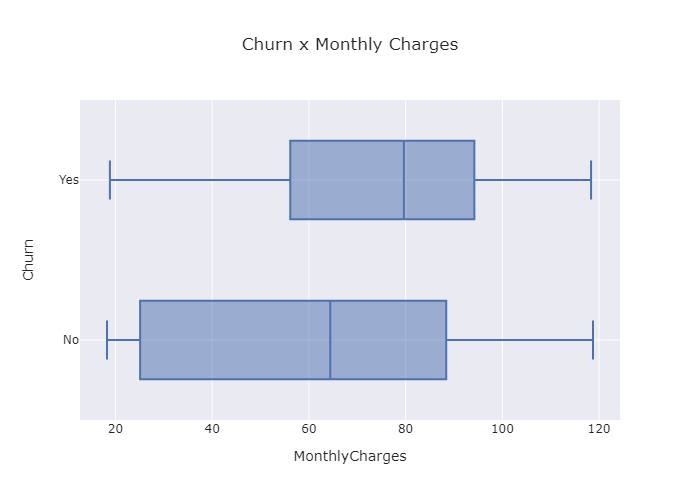

In [84]:
# Statistics on churn x monthly charges
print(df.groupby('Churn').MonthlyCharges.describe().round(0))
# Visualizing how churn interacts with monthly charges
fig = px.box(df, x = 'MonthlyCharges', y = 'Churn', template = 'seaborn',
            title = 'Churn x Monthly Charges')
fig.show('png')

Now, this is **some interesting** information!<br><br>
Through the boxplot above, it's clear to see that customers who leave are those who pay more monthly for their services! <br><br>
Averagely, the monthly cost for these clients was 21.31% higher than the average cost for clients who stayed in the company! Even among the clients who paid less, the ones who left the company still paid 124% more than those who stayed.

        count    mean     std   min    25%     50%     75%     max
Churn                                                             
No     5174.0  2550.0  2330.0   0.0  573.0  1680.0  4263.0  8672.0
Yes    1869.0  1532.0  1891.0  19.0  134.0   704.0  2331.0  8685.0


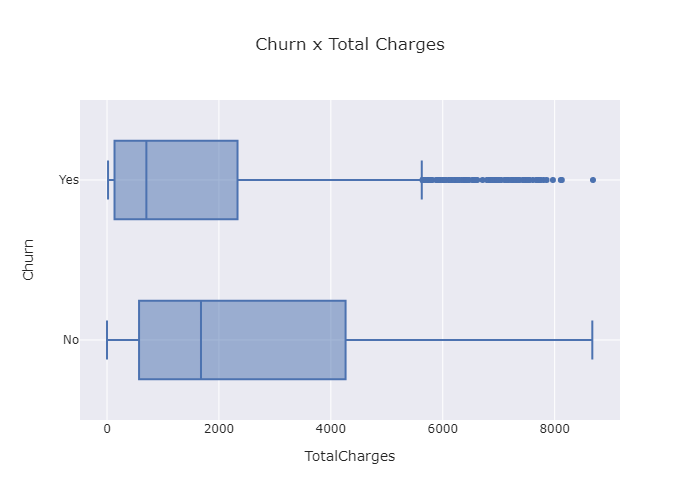

In [85]:
# Statistics on churn x total charges
print(df.groupby('Churn').TotalCharges.describe().round(0))
# Visualizing how churn interacts with total charges
fig = px.box(df, x = 'TotalCharges', y = 'Churn', template = 'seaborn',
            title = 'Churn x Total Charges')
fig.show('png')

Even though clients who leave the company pay more monthly, those who stay as clients end up with higher amounts of total charges. It isn't surprising, since they usually stay longer with us, so their total amount of payments will be higher than those who left the company much earlier.

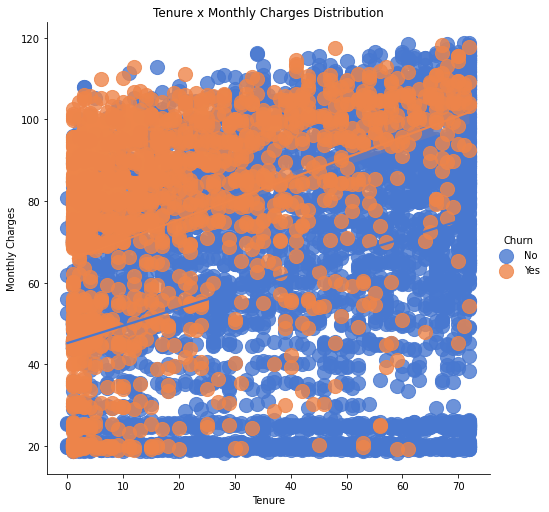

In [14]:
# Tenure x Monthly Charges distribution
g = sns.lmplot(height = 7, data = df, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'muted')
g.set(xlabel = 'Tenure',
     ylabel = 'Monthly Charges')
g = plt.title('Tenure x Monthly Charges Distribution')

Not only can we see a large concentration of clients who left the company in the upper left part of the plot above, but we can also see a higher trendline for clients who left, confirming that they do have higher charges per month than those who stay.

Let's now check how the variable **churn** relates to the categorical variables

In [15]:
# Creating a Dataframe containing only clients who left
churn = df.query("Churn == 'Yes'")
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


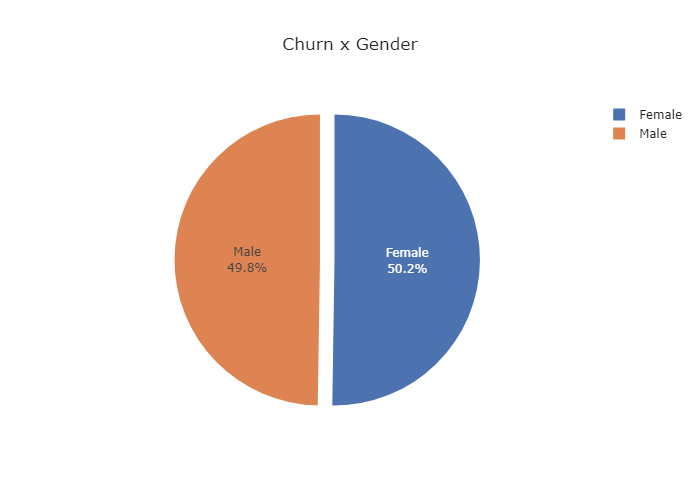

In [86]:
# Churn x gender
fig = px.pie(churn, names = 'gender', template = 'seaborn',
            title = 'Churn x Gender')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

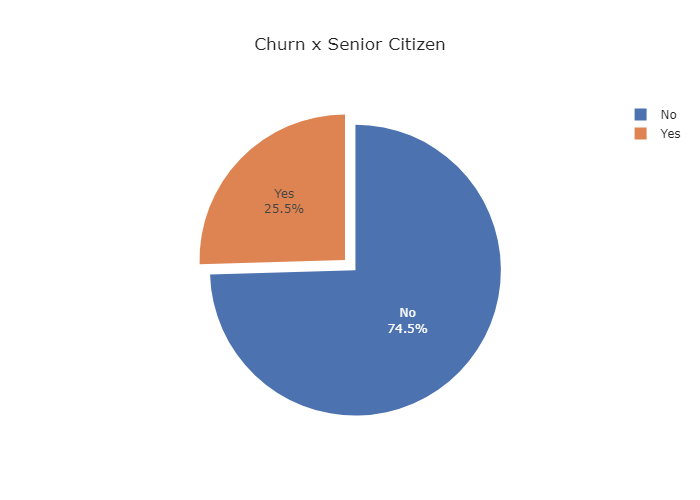

In [87]:
# Churn x SeniorCitizen
fig = px.pie(churn, names = ['No', 'Yes'], template = 'seaborn', 
             values = churn.SeniorCitizen.value_counts(),
            title = 'Churn x Senior Citizen')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

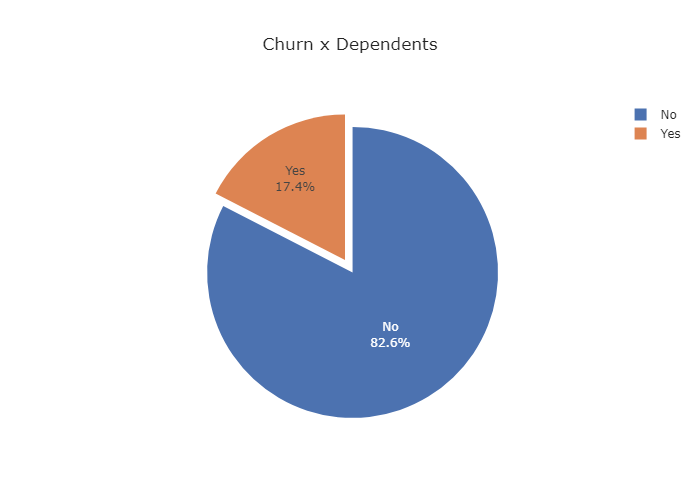

In [88]:
# Churn x dependents
fig = px.pie(churn, names = 'Dependents', template = 'seaborn',
            title = 'Churn x Dependents')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

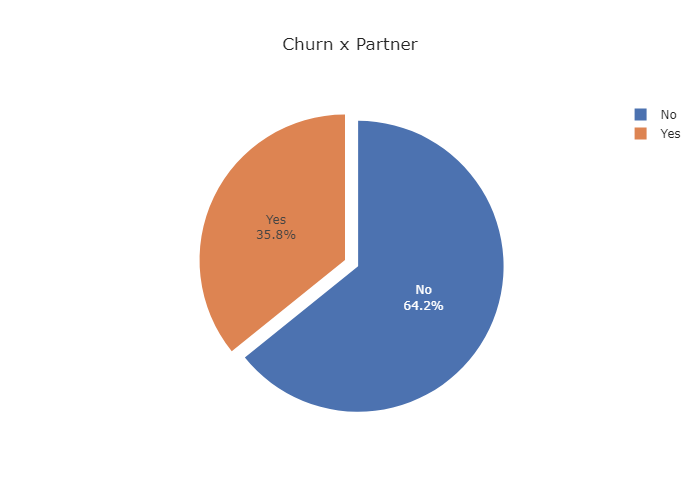

In [89]:
# Churn x partner
fig = px.pie(churn, names = 'Partner', template = 'seaborn',
            title = 'Churn x Partner')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

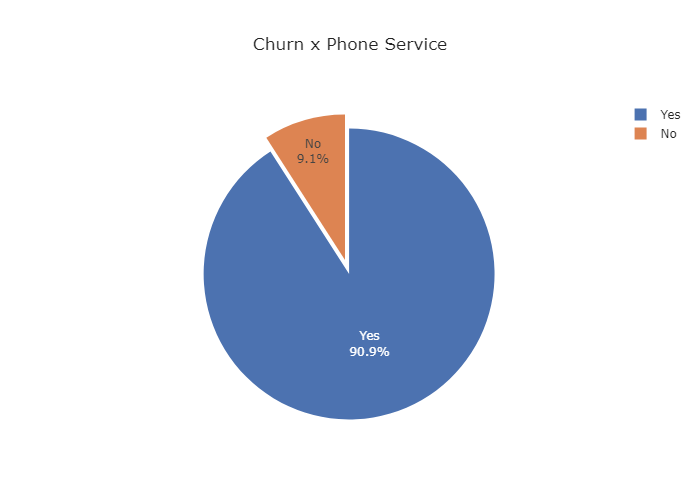

In [90]:
# Churn x Phone Service
fig = px.pie(churn, names = 'PhoneService', template = 'seaborn',
            title = 'Churn x Phone Service')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

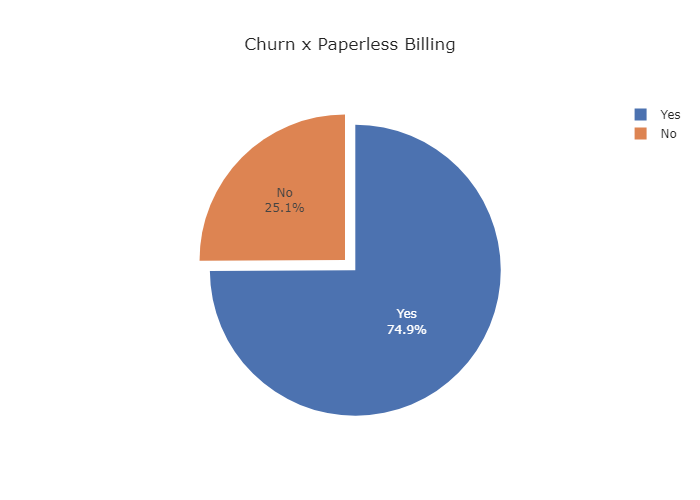

In [91]:
# Churn x Paperless Billing
fig = px.pie(churn, names = 'PaperlessBilling', template = 'seaborn',
            title = 'Churn x Paperless Billing')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show('png')

When we analyzed categorical information regarding clients who have left the company, we can draw a few conclusions about this type of client.<br><br>
- First, we have a lot of indicators showing that these clients are **young**, probably in their 20's and early 30's, considering that they're mostly not senior citizens, 82.6% of them have no dependents and 64.2% have no partners.<br><br>
- Secondly, they also prefer paperless billing which makes me wonder if everything is ok with how these clients are receiving their bills! Are they receiving them in their emails? Is the service good enough and easily allowing them to pay their bills with no trouble? Are they receiving their bills at the right time and on the right platform?

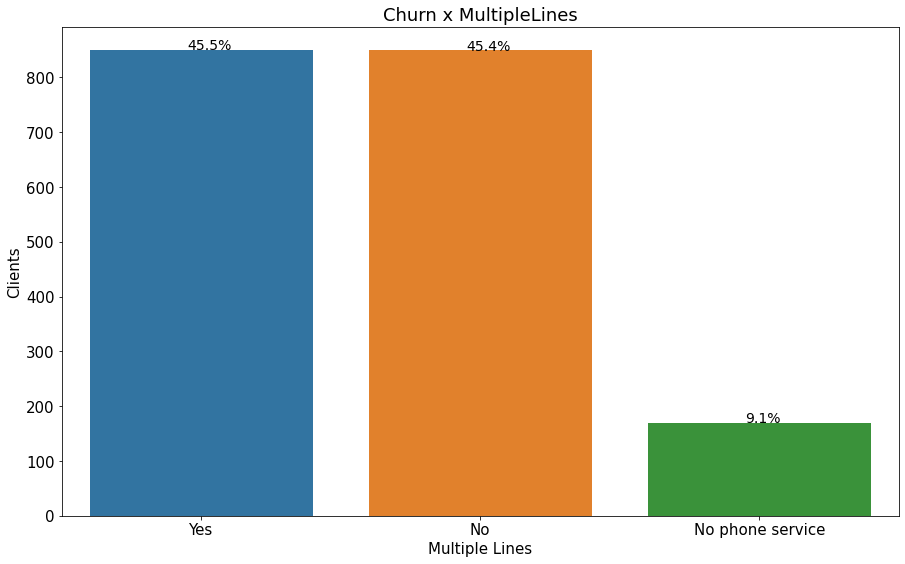

In [22]:
# Churn x Multiple Lines
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'MultipleLines',
                data = churn, order =churn['MultipleLines'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Multiple Lines', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x MultipleLines', size = 18)
def percent(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
percent(ax, churn.MultipleLines)

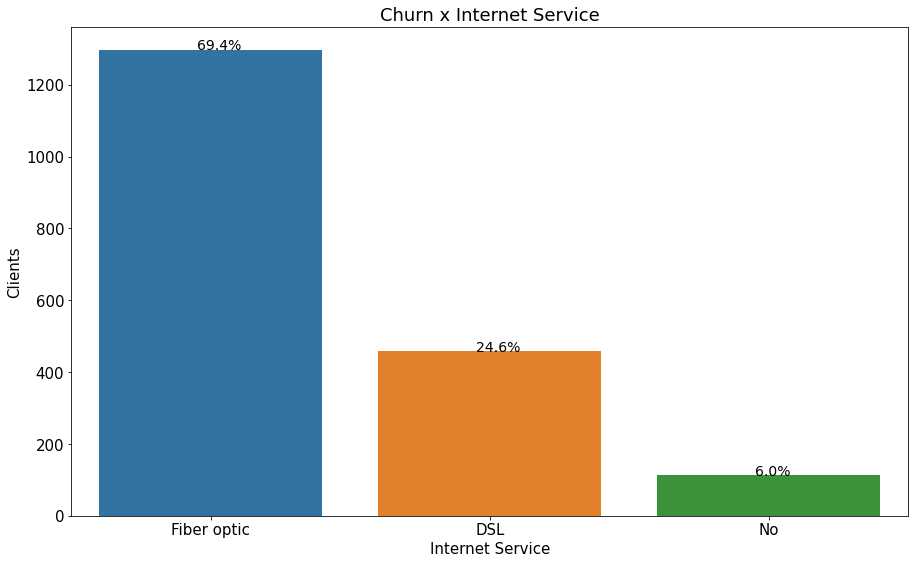

In [23]:
# Churn x Internet Service
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'InternetService',
                data = churn, order =churn['InternetService'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Internet Service', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Internet Service', size = 18)
percent(ax, churn.InternetService)

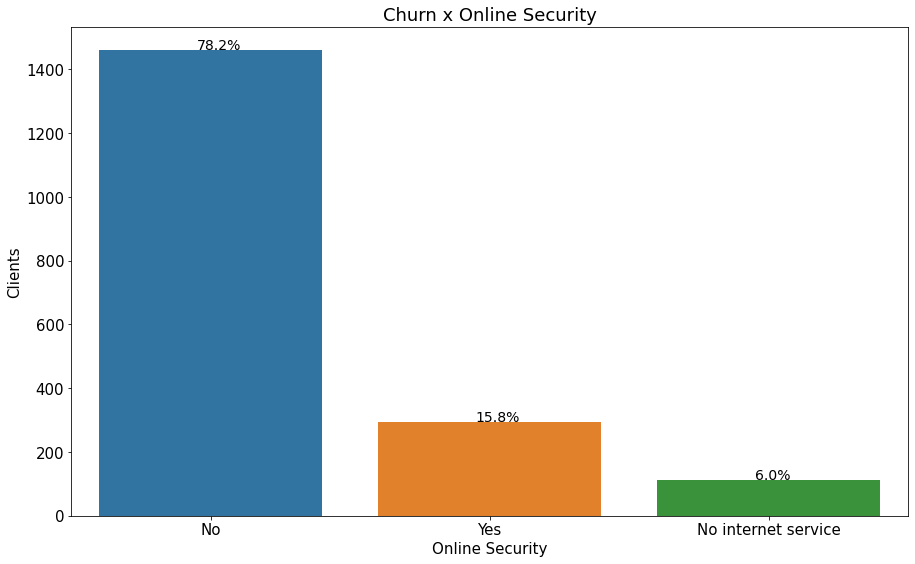

In [24]:
# Churn x Online Security
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'OnlineSecurity',
                data = churn, order =churn['OnlineSecurity'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Online Security', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Online Security', size = 18)
percent(ax, churn.OnlineSecurity)

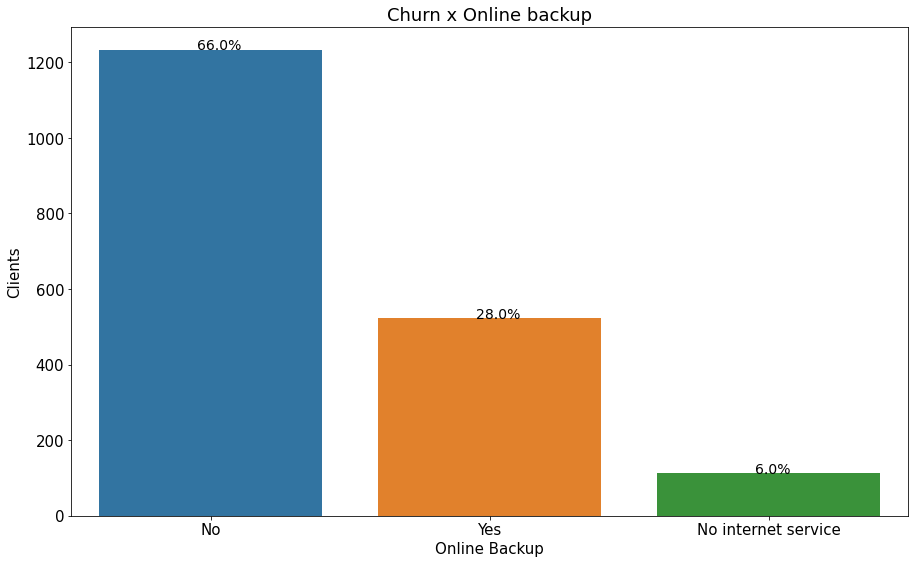

In [25]:
# Churn x Online Backup
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'OnlineBackup',
                data = churn, order =churn['OnlineBackup'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Online Backup', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Online backup', size = 18)
percent(ax, churn.OnlineBackup)

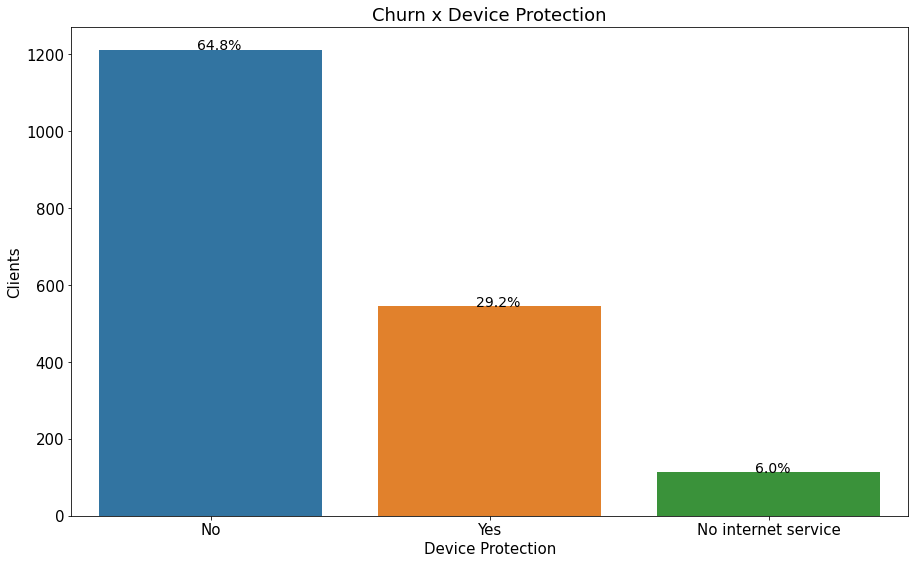

In [26]:
# Churn x Device Protection
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'DeviceProtection',
                data = churn, order =churn['DeviceProtection'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Device Protection', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Device Protection', size = 18)
percent(ax, churn.DeviceProtection)

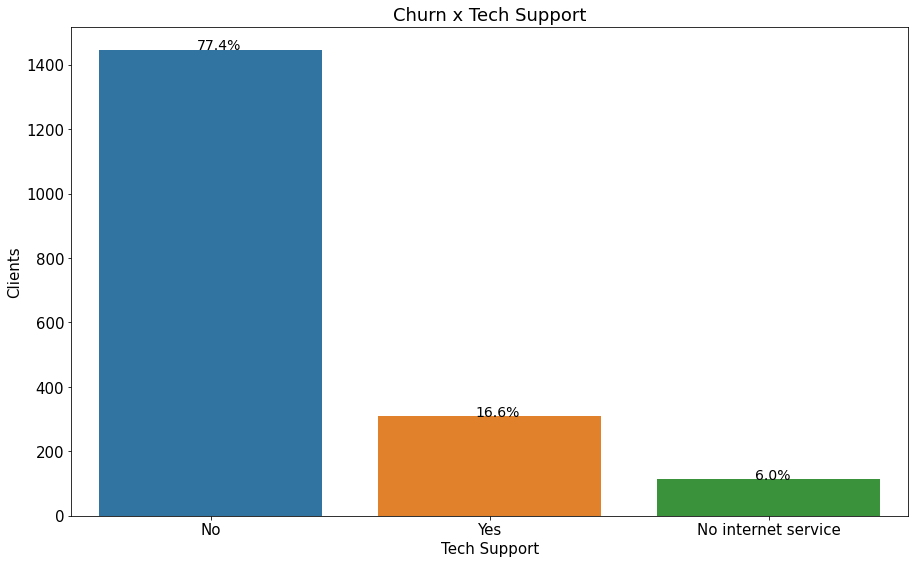

In [27]:
# Churn x Tech Support
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'TechSupport',
                data = churn, order =churn['TechSupport'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Tech Support', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Tech Support', size = 18)
percent(ax, churn.TechSupport)

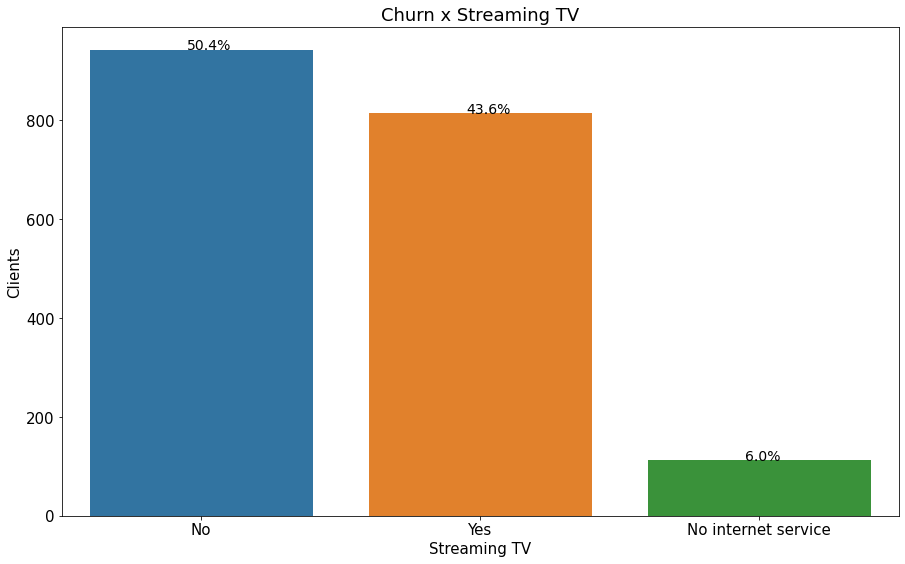

In [28]:
# Churn x Streaming TV
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'StreamingTV',
                data = churn, order =churn['StreamingTV'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Streaming TV', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Streaming TV', size = 18)
percent(ax, churn.StreamingTV)

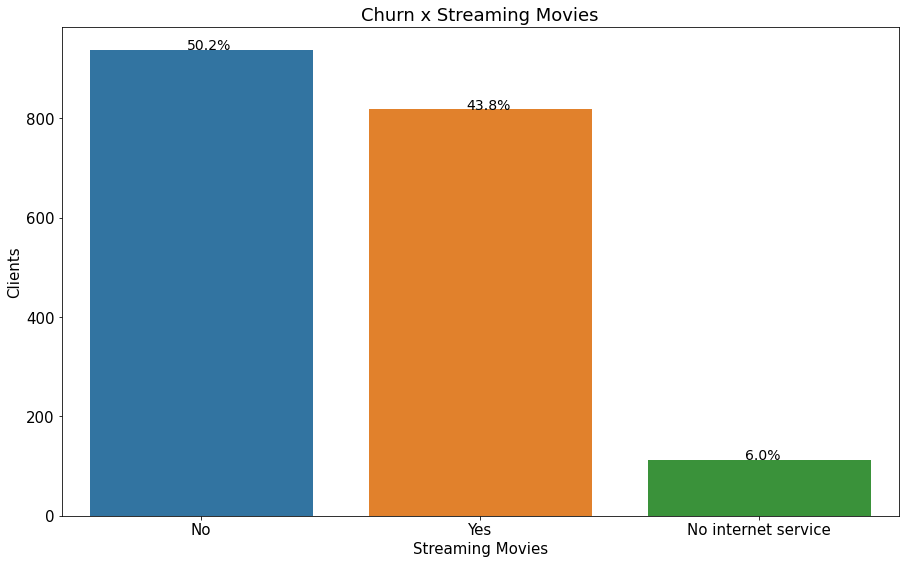

In [29]:
# Churn x Streaming Movies 
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'StreamingMovies',
                data = churn, order =churn['StreamingMovies'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Streaming Movies', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Streaming Movies', size = 18)
percent(ax, churn.StreamingMovies)

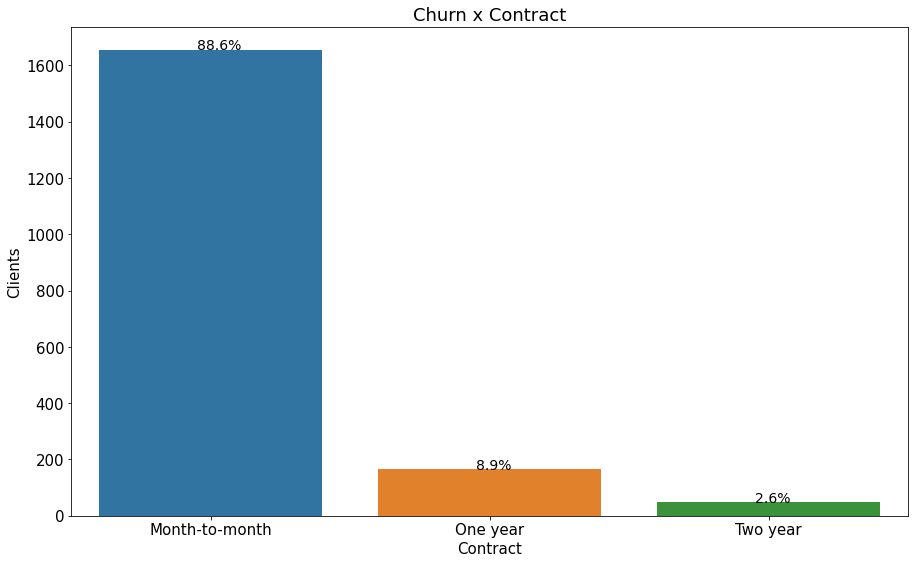

In [30]:
# Churn x Contract
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'Contract',
                data = churn, order =churn['Contract'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Contract', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Contract', size = 18)
percent(ax, churn.Contract)

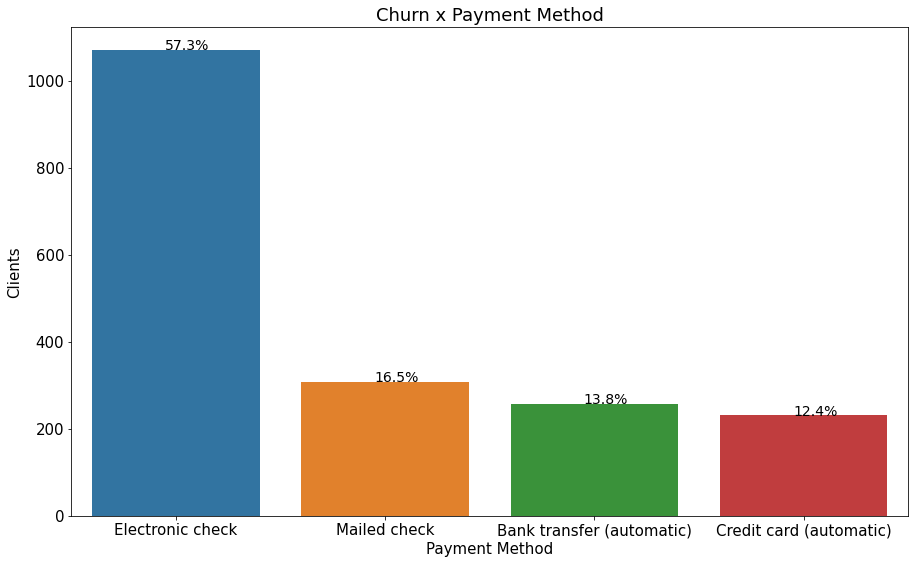

In [31]:
# Churn x Payment Method
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'PaymentMethod',
                data = churn, order =churn['PaymentMethod'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Payment Method', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Payment Method', size = 18)
percent(ax, churn.PaymentMethod)

Some intriguing facts pop up when analyzing multicategory variables.<br><br>
- Clients who left don't sign up for additional services, meaning they're left without tech support, device protection, backup security, etc. This could definitely be a problem! What if clients are leaving because they don't have tech support to help them with an issue they're facing? Or they've had issues with their devices and they weren't covered? <br><br>
- Most of them had fiber-optic services. Is it possible that the company may have some improvements to make regarding this kind of service? Or better yet, what if these clients are from a certain region where fiber optic services may be suffering issues? It would be valuable to have region information in this dataset to know where these clients are from.<br><br>
- 88.6% of clients are on a month-to-month contract and that's a huge difference between the proportion of churn clients who were on one-year and two-year contracts. We can definitely see that a month-to-month contract makes it easier for clients to cancel their subscription, so we should offer them benefits to make both the yearly and biyearly contracs much more appealing than a month-to-month contract.<br><br>
- Lastly, most clients opted for an electronic check as a payment method and once again I question, do these checks get sent to the right platforms at the right time? Are we having any issues regarding the electronic check payment service?<br><br>

There is so much relevant information we were able to gather just by analyzing and visualizing data!<br><br>

With this information, the company now has a profile in mind of clients who discontinued their subscriptions and now can develop some studies to track each one of these problems down and act on strategies to retain these clients.

# Machine Learning Model

Our job isn't done yet! We still have to develop a machine learning model that will identify, according to independent variables, clients who are more likely to leave.<br><br>
This kind of model is important because a company will be aware that certain clients are unhappy with the service and likely to churn, so it's possible to reach that client before he leaves and work on a deal to retain it.

In [32]:
# Let's split our dataset into independent (X) and dependent (y) variables
X = df.drop('Churn', axis = 1)
y = df.Churn
print('= = = = = = = = = = Independent Variables = = = = = = = = = =\n')
print(X)
print('= = = = = = = = = = Target Variable = = = = = = = = = = = = =\n')
print(y)

= = = = = = = = = = Independent Variables = = = = = = = = = =

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone

In [33]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  4930
X test size:  2113
y train size:  4930
y test size:  2113


In [34]:
# Encoding categorical variables
encoder = OrdinalEncoder()
categorical_columns_train = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train[categorical_columns_train] = encoder.fit_transform(X_train[categorical_columns_train])
categorical_columns_test = [col for col in X_test.columns if X_test[col].dtype == 'object']
X_test[categorical_columns_test] = encoder.transform(X_test[categorical_columns_test])

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_17940\4132404863.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_17940\4132404863.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,1.0,0,0.0,0.0,20,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,68.70,1416.20
4395,0.0,0,1.0,1.0,69,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,103.95,7446.90
1579,1.0,1,1.0,0.0,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,80.45,950.20
1040,1.0,1,0.0,0.0,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,90.45,1266.10
1074,1.0,0,0.0,0.0,1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,21.10,21.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1,0.0,0.0,9,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,100.50,918.60
5192,1.0,0,0.0,1.0,60,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,19.95,1189.90
3980,1.0,0,0.0,0.0,28,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,105.70,2979.50
235,1.0,0,0.0,0.0,2,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,54.40,114.10


In [36]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3381,0.0,0,0.0,0.0,41,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,79.85,3320.75
6180,0.0,1,0.0,0.0,66,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,102.40,6471.85
4829,0.0,0,0.0,0.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.00,524.35
3737,0.0,0,0.0,0.0,5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,50.60,249.95
4249,0.0,0,1.0,1.0,10,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0,0.0,1.0,10,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,40.25,411.45
1351,1.0,0,1.0,1.0,11,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,20.45,250.80
2048,1.0,1,0.0,0.0,21,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,96.80,2030.30
6218,0.0,0,1.0,1.0,70,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,58.40,4113.15


In [37]:
# Transform Churns into binary values
y_train.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [38]:
# Transform Churns into binary values
y_test.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [39]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_17940\3858261733.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_17940\3858261733.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,1.0,0,0.0,0.0,-0.497482,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.129755,-0.378089
4395,0.0,0,1.0,1.0,1.498180,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.299897,2.278159
1579,1.0,1,1.0,0.0,-0.823305,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.519802,-0.583341
1040,1.0,1,0.0,0.0,-0.741849,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.851757,-0.444202
1074,1.0,0,0.0,0.0,-1.271311,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-1.450350,-0.992567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1,0.0,0.0,-0.945488,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.185372,-0.597260
5192,1.0,0,0.0,1.0,1.131630,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,-1.488525,-0.477764
3980,1.0,0,0.0,0.0,-0.171660,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.357989,0.310473
235,1.0,0,0.0,0.0,-1.230583,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.344940,-0.951605


In [41]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3381,0.0,0,0.0,0.0,0.357802,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.499885,0.460778
6180,0.0,1,0.0,0.0,1.375997,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.248444,1.848694
4829,0.0,0,0.0,0.0,-0.823305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.656978,-0.770909
3737,0.0,0,0.0,0.0,-1.108399,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.471083,-0.891769
4249,0.0,0,1.0,1.0,-0.904760,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,0.036808,-0.711139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0,0.0,1.0,-0.904760,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,-0.814656,-0.820636
1351,1.0,0,1.0,1.0,-0.864033,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,-1.471927,-0.891395
2048,1.0,1,0.0,0.0,-0.456755,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.062549,-0.107606
6218,0.0,0,1.0,1.0,1.538908,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,-0.212158,0.809794


In [42]:
# Dealing with imbalanced data 
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [43]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [44]:
y_train.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [45]:
# Running Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_predict = rf.predict(X_test)

#Running Ada Boost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_y_predict = ab.predict(X_test)

# Running Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y_predict = gb.predict(X_test)

# Running Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_y_predict = et.predict(X_test)

### Scores

Accuracy: 78.75%
Precision: 56.75%
Recall: 62.88%
F1_Score: 59.66%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

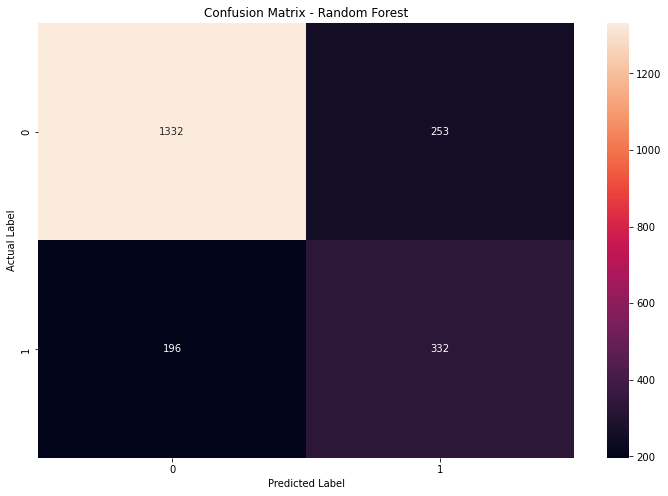

In [46]:
# Random Forest
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, rf_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, rf_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, rf_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, rf_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 78.23%
Precision: 54.66%
Recall: 75.57%
F1_Score: 63.43%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

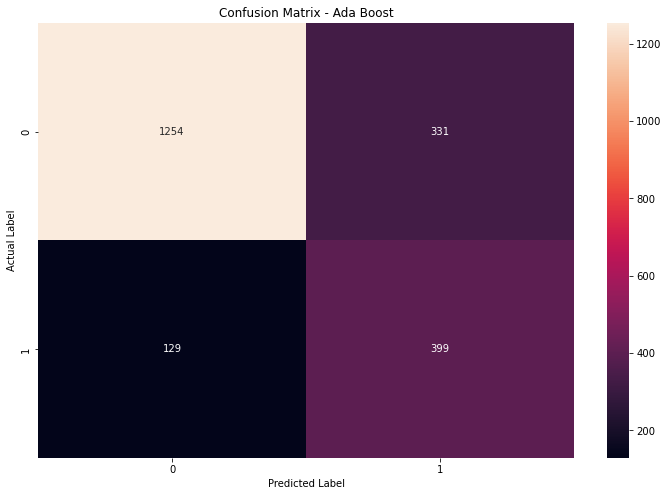

In [47]:
# Ada Boost
print('Accuracy: %.2f%%' % (accuracy_score(y_test, ab_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, ab_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, ab_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, ab_y_predict) * 100))
confusion_matrix_ab = confusion_matrix(y_test, ab_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 78.89%
Precision: 56.03%
Recall: 72.16%
F1_Score: 63.08%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

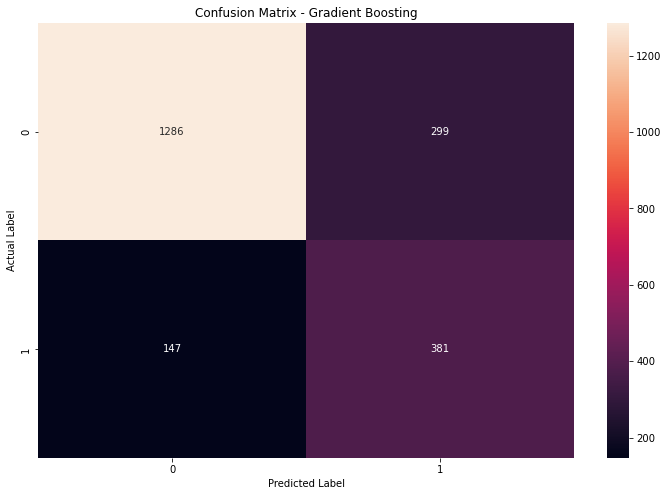

In [48]:
# Gradient Boosting
print('Accuracy: %.2f%%' % (accuracy_score(y_test, gb_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, gb_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, gb_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, gb_y_predict) * 100))
confusion_matrix_gb = confusion_matrix(y_test, gb_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 77.85%
Precision: 55.47%
Recall: 57.58%
F1_Score: 56.51%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

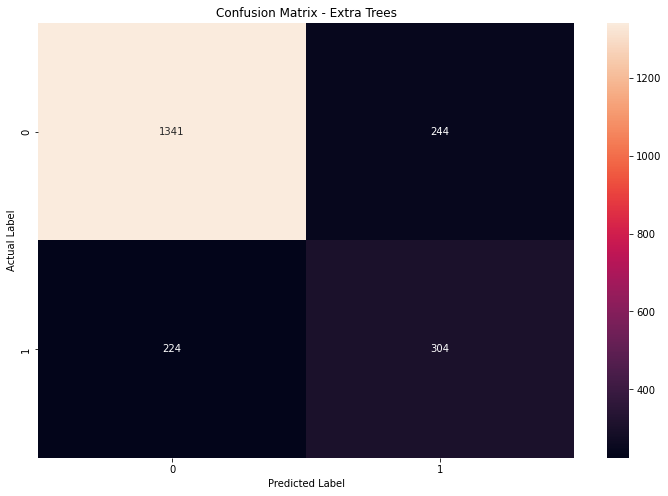

In [49]:
# Extra Trees
print('Accuracy: %.2f%%' % (accuracy_score(y_test, et_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, et_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, et_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, et_y_predict) * 100))
confusion_matrix_et = confusion_matrix(y_test, et_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_et, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Extra Trees')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [50]:
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

Ada Boost Classifier best predicted churn clients, correctly predicting 399 out of 528 (75.57%). <br><br>
I'm still **not** satisfied with that and want to achieve better results. It's time to optimize our model!

In [67]:
# Tuning Ada Boost
grid = {'n_estimators' : [50,100,500,1500,2000],
       'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0]}

cv = ShuffleSplit()
adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions = grid,
                             cv = cv,
                             n_iter = 10,
                             scoring = 'recall')
adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall')

In [68]:
adaboost.best_params_

{'n_estimators': 500, 'learning_rate': 0.2}

In [69]:
tune_adaboost = AdaBoostClassifier(**adaboost.best_params_)
tune_adaboost.fit(X_train, y_train)
y_pred = tune_adaboost.predict(X_test)

Accuracy: 77.99%
Precision: 54.25%
Recall: 76.14%
F1_Score: 63.36%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

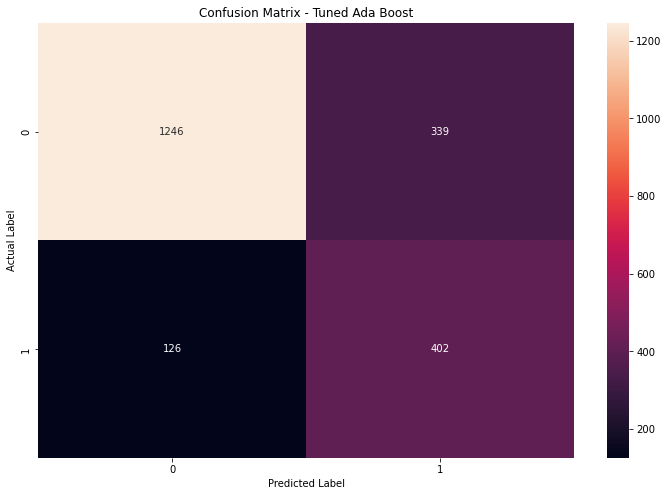

In [70]:
# Tuned Ada Boost
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_tuned_adaboost = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_tuned_adaboost, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [71]:
# Tuning Gradient Boosting
grid2 = {'n_estimators':[500,1000,1500,2000,2500],
        'learning_rate':[0.01,0.05,0.2,0.1,0.15,0.3,0.5],
        'min_samples_split':[2,5,6,10],
        'min_samples_leaf':[3,5,8,12]}

gradientboosting = RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions = grid2,
                             cv = cv,
                             n_iter = 10,
                             scoring = 'recall')
gradientboosting.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.2, 0.1,
                                                          0.15, 0.3, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 12],
                                        'min_samples_split': [2, 5, 6, 10],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500]},
                   scoring='recall')

In [72]:
gradientboosting.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'learning_rate': 0.05}

In [73]:
tune_gradientboosting = GradientBoostingClassifier(**gradientboosting.best_params_)
tune_gradientboosting.fit(X_train, y_train)
y_pred_gb = tune_gradientboosting.predict(X_test)

Accuracy: 79.65%
Precision: 57.83%
Recall: 68.56%
F1_Score: 62.74%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

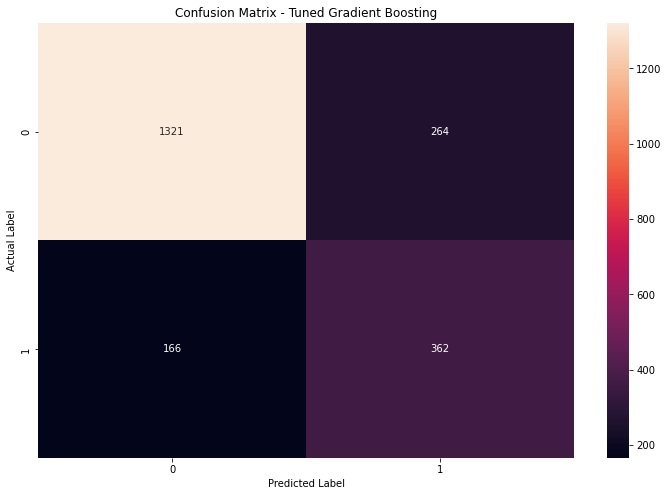

In [74]:
# Tuned Gradient Boosting scores
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_gb) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_gb) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_gb) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_gb) * 100))
confusion_matrix_tuned_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_tuned_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Conclusion<br>
After utilizing RandomizedSearchCV to improve Ada Boost Classifier and Gradient Boosting Classifier's recall scores, we ended up with a tuned Ada Boost model that correctly predicted 402 churn clients out of 528.<br><br>

Tuning Ada Boost resulted in a slight improvement. Maybe applying some **feature engineering** techniques could help us reach even better improvements.<br><br>

Well, at the end of this project, we have a classification model that can correctly predict 76.14% of clients that are likely to churn and, even more than that, exploratory data analysis made it possible for us to draw a profile of clients that discontinue their subscriptions and the kind of services and contracts they usually sign for, which helps the company to make specific improvements and develop strategies to retain these clients.<br><br>

Thank you very much!<br><br>

*Luís Fernando Torres*